In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys
import pandas as pd
import pickle

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

from mergeResults import *
sns.set(style="whitegrid")

In [175]:
def plot_all(dirname,expname,gurobi=False, fcla=False,
             log=True, sortby="vcount",xlabel="Network size [Nodes]"):
    if (gurobi):
        results15 = load_results(os.path.join(data_path, "clustered", dirname, "solutions", "gurobi"), 
                           os.path.join(data_path,'clustered',dirname))
    if (fcla):
        results15_fcla = load_results(os.path.join(data_path, "clustered", dirname, "solutions", "fcla"), 
                                   os.path.join(data_path,'clustered',dirname))
    results15_fcla_l0 = load_results(os.path.join(data_path, "clustered", dirname, "solutions", "fcla_l0"), 
                               os.path.join(data_path,'clustered',dirname))
    results15_hilbert = load_results(os.path.join(data_path, "clustered", dirname, "solutions", "hilbert"), 
                               os.path.join(data_path,'clustered',dirname))
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(5, 5), dpi=300)
    ax1.set_yscale("log", nonposx='clip')
    if (log):
        ax1.set_xscale("log", nonposx='clip', basex=2)
    if (fcla):
        results15_fcla = results15_fcla.sort_values(by=sortby)
    if (gurobi):
        results15 = results15.sort_values(by=sortby)
    results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
    results15_hilbert = results15_hilbert.sort_values(by=sortby)
    if (fcla):
        ax1.plot(results15_fcla[sortby],results15_fcla['runtime'], 'k.-', label="WMA BF")
    if (gurobi):
        results15 = results15[results15['objective'].notnull()]
        ax1.plot(results15[sortby],results15['runtime'], 'g^--', label="Gurobi")
    results15_fcla_l0 = results15_fcla_l0[results15_fcla_l0['objective'].notnull()]
    ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['runtime'], 'ro:',label="WMA")
    ax1.plot(results15_hilbert[sortby],results15_hilbert['runtime'], 'bs-',label="Hilbert")
    ax1.set_ylabel("Runtime [Sec]")
#     plt.title(expname)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=3, mode="expand", borderaxespad=0.)
    ax1.set_xlim([256, 16384])
    ax2.set_xlim([256, 16384])
    plt.setp(ax1.get_xticklabels(), visible=False)
    
#     fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
#     ax2.set_yscale("log", nonposx='clip')
    
    if (log):
        ax2.set_xscale("log", nonposx='clip', basex=2)
    if (fcla):
        results15_fcla = results15_fcla.sort_values(by=sortby)
    if (gurobi):
        results15 = results15.sort_values(by=sortby)
    results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
    results15_hilbert = results15_hilbert.sort_values(by=sortby)
    if (fcla):
        ax2.plot(results15_fcla[sortby],results15_fcla['objective'], 'k.-',label="WMA BF")
        
    #filter nan 
#     notnanind = results15_hilbert['objective'].notnull()
#     obj =results15_hilbert['objective']
#     obj= obj[notnanind]
#     ind = results15_fcla_l0[sortby]
#     ind = ind[notnanind]
    ax2.plot(results15_fcla_l0[sortby],results15_fcla_l0['objective'], 'ro:',label="WMA")
    ax2.plot(results15_hilbert[sortby],results15_hilbert['objective'], 'bs-',label="Hilbert")
    if (gurobi):
        ax2.plot(results15[sortby],results15['objective'], 'g^--',label="Gurobi")
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Objective")
    if (not log):
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax2.ticklabel_format(style='sci', axis='y')

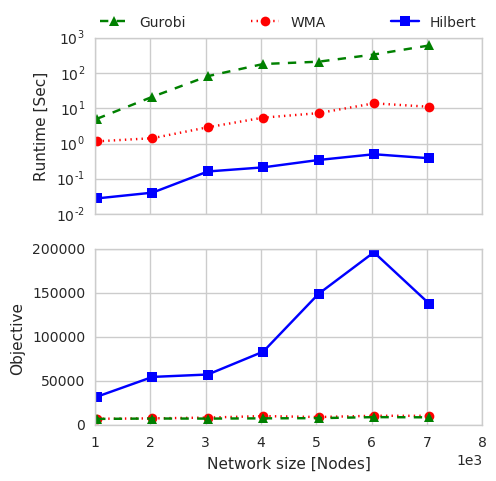

In [118]:
plot_all('n_m-n0.05c-minc2m-k10',"5% Cust, 0.5% Fac, capacity=20, 40 clusters, dens 1.5",True,log=False)

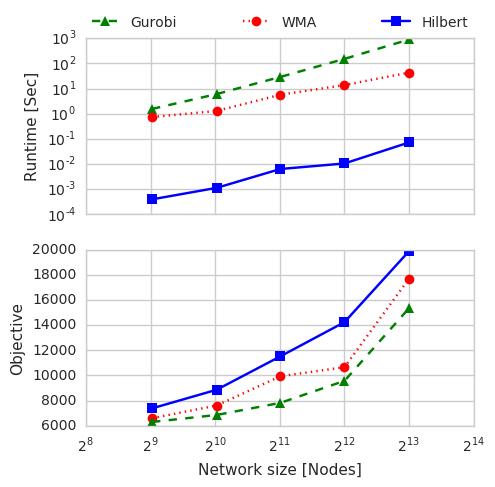

In [178]:
#not connected
plot_all('n_m-n0.05k-n0.01c20d2conClust20',"5% Customers, 0.5% Facilities, cap=20, not connected, 20 clusters",
         gurobi=True,log=True)

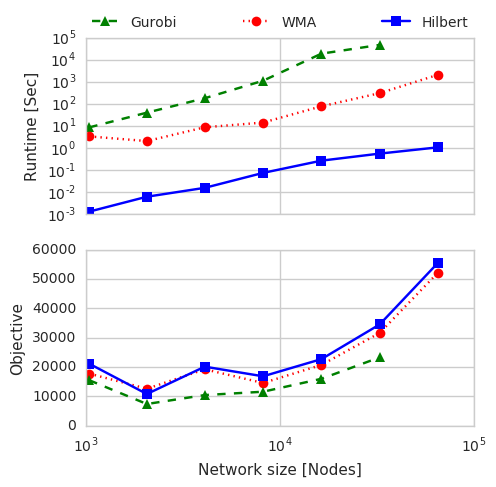

In [146]:
#some points were lost for some reason, so put this in front of gurobi plotting code:

#         print(results15)
        results15.set_value(results15[results15["id"] == "1493804677534157534"].index[0],'objective',15500)
        results15.set_value(results15[results15["id"] == "149380469216546882"].index[0],'objective',16000)
        results15.set_value(results15[results15["id"] == "1493804677534157534"].index[0],'runtime',9)
        results15.set_value(results15[results15["id"] == "149380469216546882"].index[0],'runtime',20000)
#         print(results15)

plot_all('n_m-n0.05k-n0.01c20d1conClust20',"5% Cust, 1% Fac, cap=100, not conn, 20 clust, density=1",True,False)

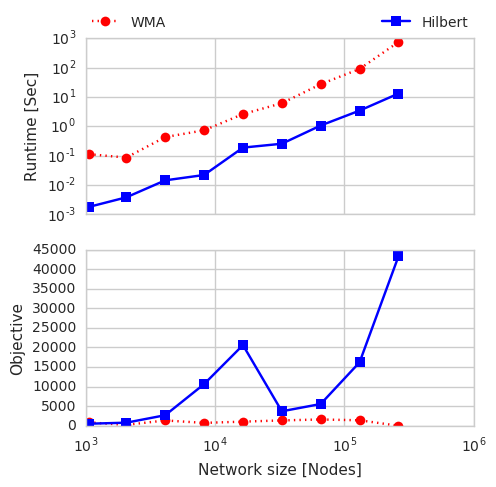

In [147]:
plot_all('n_m-n0.01c3',"1% Cust, 0.5% Fac, cap=3, not conn, 20 clust, density=2",False,False,True)

In [44]:
results15_fcla_l0 = load_results(os.path.join(data_path, "clustered", 'n_m-n0.01c3', "solutions", "fcla_l0"), 
                               os.path.join(data_path,'clustered','n_m-n0.01c3'))

In [46]:
results15_fcla_l0[['objective','runtime','vcount']]

,objective,runtime,vcount
0,1057.0,2.618050,16400.0
1,1403.0,90.107900,131100.0
2,226.0,0.086268,2050.0
3,1361.0,0.431368,4100.0
4,737.0,0.731957,8200.0
5,1609.0,27.229500,65550.0
6,1371.0,6.141410,32800.0
7,854.0,0.112586,1050.0
8,0.0,743.437000,262150.0


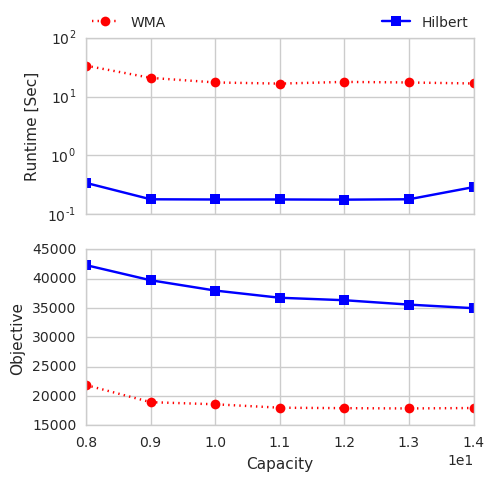

In [149]:
plot_all('c_n10000m1000k100cl20d1.5',"",False,False,False,sortby="capacity of facilities",xlabel="Capacity")

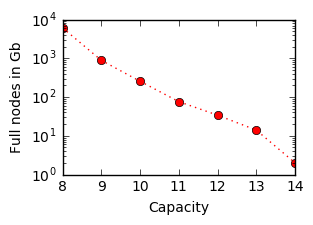

In [74]:
results15_fcla_l0 = load_results(os.path.join(data_path, "clustered", 'c_n10000m1000k100cl20d1.5',
                                              "solutions", "fcla_l0"), 
                               os.path.join(data_path,'clustered','c_n10000m1000k100cl20d1.5'))
fig, ax1 = plt.subplots(figsize=(3, 2), dpi=300)
ax1.set_yscale("log", nonposx='clip')
sortby="capacity of facilities"
results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['fullfac'], 'ro:',label="WMA")

ax1.set_ylabel("Full nodes in Gb")
ax1.set_xlabel("Capacity")
#     plt.title(expname)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=3, mode="expand", borderaxespad=0.)

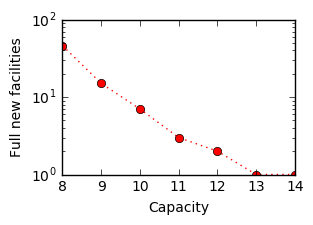

In [76]:
results15_fcla_l0 = load_results(os.path.join(data_path, "clustered", 'c_n10000m1000k100cl20d1.5',
                                              "solutions", "fcla_l0"), 
                               os.path.join(data_path,'clustered','c_n10000m1000k100cl20d1.5'))
fig, ax1 = plt.subplots(figsize=(3, 2), dpi=300)
ax1.set_yscale("log", nonposx='clip')
sortby="capacity of facilities"
results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['full facilities'], 'ro:',label="WMA")

ax1.set_ylabel("Full new facilities")
ax1.set_xlabel("Capacity")

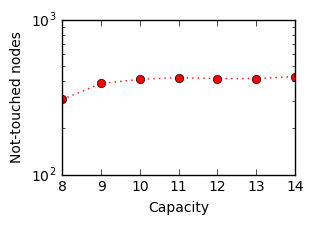

In [77]:
results15_fcla_l0 = load_results(os.path.join(data_path, "clustered", 'c_n10000m1000k100cl20d1.5',
                                              "solutions", "fcla_l0"), 
                               os.path.join(data_path,'clustered','c_n10000m1000k100cl20d1.5'))
fig, ax1 = plt.subplots(figsize=(3, 2), dpi=300)
ax1.set_yscale("log", nonposx='clip')
sortby="capacity of facilities"
results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['nullfac'], 'ro:',label="WMA")

ax1.set_ylabel("Not-touched nodes")
ax1.set_xlabel("Capacity")

In [53]:
results15_fcla_l0

,Created,capacity of facilities,connectivity check time,facilities left after termination,fcla initialization,id,lambda,number of components,number of facilities,number of iterations,...,max_degree,max_dist,min_degree,min_dist,source_avg_clust,source_avg_degree,source_num,std_degree,std_dist,vcount
0,Fri May 12 18:27:40 2017,12.0,0.007217,4.0,0.292277,149443190884806512,0.0,211.0,200.0,302.0,...,89.0,10019.0,0.0,0.0,0.57734,21.33,1000.0,249.095707,1.128732e+07,10020.0
1,Fri May 12 18:26:25 2017,8.0,0.007234,2.0,0.340827,149443190884806512,0.0,211.0,200.0,509.0,...,89.0,10019.0,0.0,0.0,0.57734,21.33,1000.0,249.095707,1.128732e+07,10020.0
2,Fri May 12 18:26:46 2017,9.0,0.007165,1.0,0.324339,149443190884806512,0.0,211.0,200.0,298.0,...,89.0,10019.0,0.0,0.0,0.57734,21.33,1000.0,249.095707,1.128732e+07,10020.0
3,Fri May 12 18:27:05 2017,10.0,0.009721,0.0,0.380538,149443190884806512,0.0,211.0,200.0,303.0,...,89.0,10019.0,0.0,0.0,0.57734,21.33,1000.0,249.095707,1.128732e+07,10020.0
4,Fri May 12 18:27:58 2017,13.0,0.003675,6.0,0.209440,149443190884806512,0.0,211.0,200.0,302.0,...,89.0,10019.0,0.0,0.0,0.57734,21.33,1000.0,249.095707,1.128732e+07,10020.0
5,Fri May 12 18:28:17 2017,14.0,0.003552,0.0,0.217786,149443190884806512,0.0,211.0,200.0,300.0,...,89.0,10019.0,0.0,0.0,0.57734,21.33,1000.0,249.095707,1.128732e+07,10020.0
6,Fri May 12 18:27:23 2017,11.0,0.008012,0.0,0.401474,149443190884806512,0.0,211.0,200.0,301.0,...,89.0,10019.0,0.0,0.0,0.57734,21.33,1000.0,249.095707,1.128732e+07,10020.0


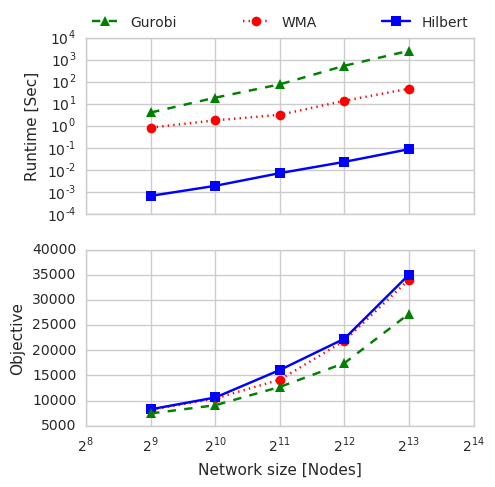

In [176]:
plot_all('n_m-n0.1k-n0.01c20d2conClust5',"",gurobi=True,sortby="vcount",log=True)

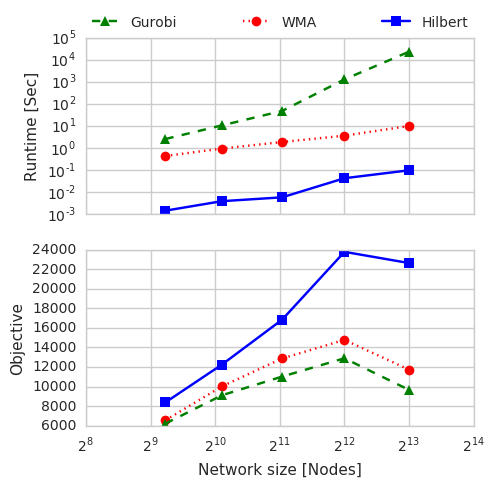

In [177]:
plot_all('n_m-n0.1k-n0.01c20d2conClust100',"",gurobi=True,sortby="vcount",log=True)

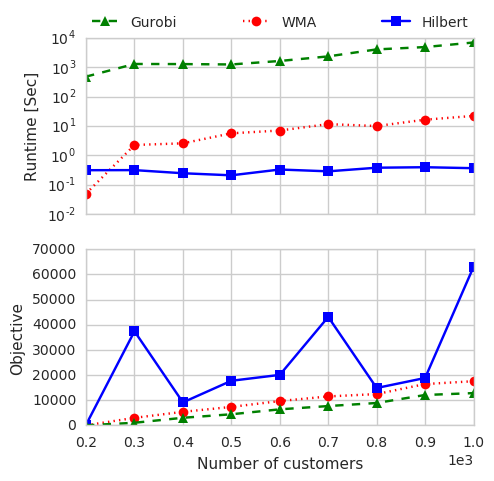

In [153]:
plot_all('m_n10000k200c10cl20',"",gurobi=True,sortby="source_num",xlabel="Number of customers",log=False)

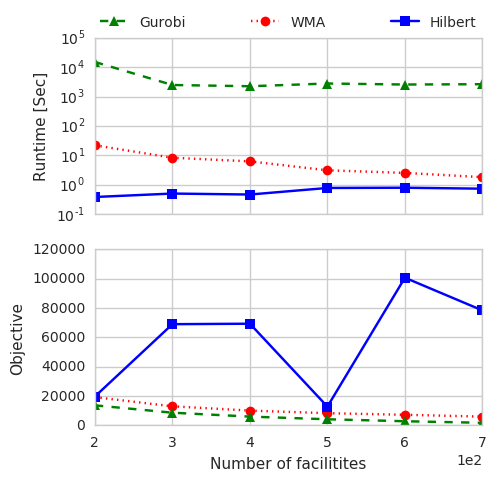

In [154]:
plot_all('k_n10000m1000c10cl20',"",gurobi=True,sortby="number of facilities",xlabel="Number of facilitites",log=False)

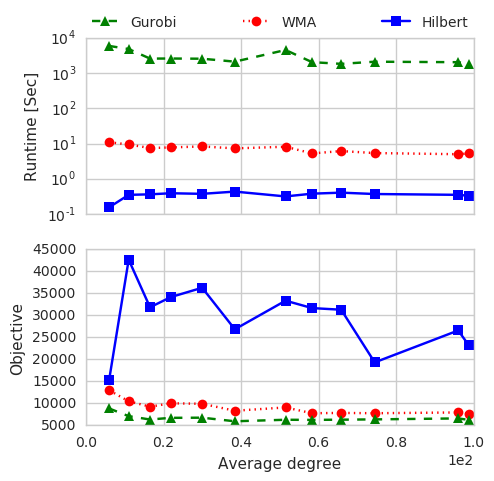

In [157]:
plot_all('d_n10000-m1000-cl40-k300-c10',"",sortby="avg_degree",xlabel="Average degree",log=False,gurobi=True)

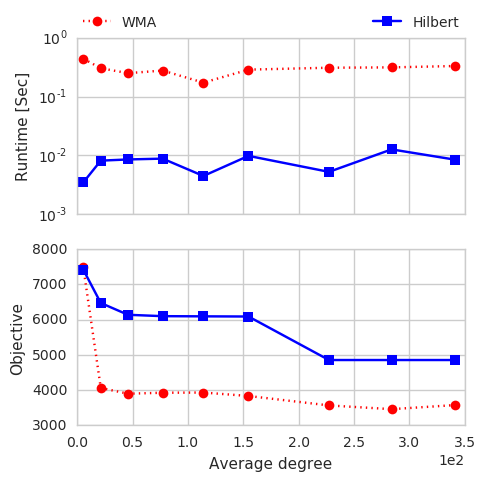

In [158]:
plot_all('d_n1000-m100-cl5-k30-c10',"",sortby="avg_degree",xlabel="Average degree",log=False)

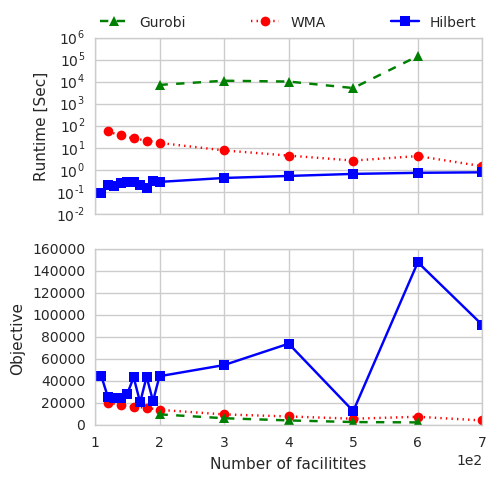

In [159]:
plot_all('kc_n10000m1000cl40',"",sortby="number of facilities",xlabel="Number of facilitites",log=False,gurobi=True)